In [60]:
import nltk as nl
import pandas as pd
import numpy as np
from PyDictionary import PyDictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
import operator
from sklearn.feature_selection import SelectKBest


from nltk.sentiment import SentimentAnalyzer # sentiment analysis
from nltk.tokenize import RegexpTokenizer #tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analysis VADER
from nltk.tokenize import sent_tokenize #sentence tokenizer

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dictionary=PyDictionary()

In [3]:
##read File
fileclick = 'C:/train1703.jsonl'
fileclick



'C:/train1703.jsonl'

In [4]:
 from nltk.corpus import words

In [5]:
#Store file in a variable
varfile = pd.read_json(fileclick, lines = True)
varfile


,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle
0,608310377143799808,[],[Apple's iOS 9 'App thinning' feature will giv...,Tue Jun 09 16:31:10 +0000 2015,['App thinning' will be supported on Apple's i...,'App thinning' will be supported on Apple's iO...,"Apple,gives,gigabytes,iOS,9,app,thinning,featu...",[Paying for a 64GB phone only to discover that...,Apple gives back gigabytes: iOS 9 'app thinnin...
1,609297109095972864,[media/609297109095972864.jpg],[RT @kenbrown12: Emerging market investors are...,Fri Jun 12 09:52:05 +0000 2015,"[Stocks Fall as Investors Watch Central Banks,...",Global investors have yanked $9.3 billion from...,"emerging market,emerging markets,em flows,em i...","[Emerging markets are out of favor., Global in...",Emerging Markets Suffer Largest Outflow in Sev...
2,609504474621612032,[],[U.S. Soccer should start answering tough ques...,Fri Jun 12 23:36:05 +0000 2015,[US to vote for Ali in FIFA election and not B...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba â€“ The bubble U.S. Soccer...",U.S. Soccer should start answering tough quest...
3,609748367049105408,[],[How theme parks like Disney World left the mi...,Sat Jun 13 15:45:13 +0000 2015,"[Some 1,000 persons turned out in Albuquerque,...","America's top family vacation spots, like the ...","disney, disney world, disney ticket prices, di...",[When Walt Disney World opened in an Orlando s...,How theme parks like Disney World left the mid...
4,608688782821453824,[media/608688782821453825.jpg],[Could light bulbs hurt your health? One compa...,Wed Jun 10 17:34:49 +0000 2015,[Electric lights have made the world safer and...,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,Warning labels on your light bulbs
5,609551038983475200,[media/609551038983475201.png],[13 classic â€™00s songs that were actually me...,Sat Jun 13 02:41:07 +0000 2015,[],,,[One artistâ€™s trash is anotherâ€™s No. 1 sin...,13 Classic â€™00s Songs That Were Actually Mea...
6,609447408955719680,[media/609447408955719681.jpg],[Dez Bryant is reportedly considering skipping...,Fri Jun 12 19:49:19 +0000 2015,[],"Wide receiver Dez Bryant has signed a new,...","Football, NFL, NFC East, Dallas Cowboys, Dez B...","[Wide receiver Dez BryantÂ has signed a new, l...","Dez Bryant Contract: Latest News, Rumors, Spec..."
7,609027430624288768,[],[Pregnant mother of 12 accused of keeping kids...,Thu Jun 11 16:00:29 +0000 2015,[],A pregnant mother of 12 is due in court on chi...,,"[TULSA, Okla. â€“ Â A pregnant mother of 12 is...",Pregnant mother of 12 accused of keeping kids ...
8,608229011572068352,[],[RT @fionamatthias: 10 ways the expat life Is ...,Tue Jun 09 11:07:51 +0000 2015,[Scotland to Seek Second Independence Referend...,Thereâ€™s no autopilot when you're an expat li...,"adventure,Alienation,Bangkok,Culture,Culture S...",[Thereâ€™s no autopilot when you live abroad. ...,10 Ways the Expat Life Is Like a Continual Esp...
9,609046214554755072,[media/609046214554755073.jpg],"[House #GOP plans two days of debate, Friday s...",Thu Jun 11 17:15:07 +0000 2015,"[Obama, Chairman Paul Ryan and Republicans act...",House Republican leaders have planned for a tw...,,[House Republican leaders have planned for a t...,"House GOP plans two days of debate, Friday sho..."


In [6]:
# np.array([varfile['postText'] if varfile['id'] = 608310377143799808])
from nltk.tokenize import RegexpTokenizer
varpd = pd.DataFrame.from_dict(varfile)

print(varpd.postText.iloc[0])


##define functions to count number of characters and words. return -1 if there are no words/characters present
def numChar(content):
    if content is None:
        return -1
    elif not content:
        return -1
    elif type(content) is str:
        return len(content)
    else:
        
        for i in content :
            return len(i)
        
    
def numWords(content):
    tokenizer = RegexpTokenizer(r'\w+')
    if content is None:
        return -1
    elif not content:
        return -1
    elif type(content) is str:
        content_no_punc = tokenizer.tokenize(content)
        if(len(content_no_punc)==0):
            return -1
        else:
            return len(content_no_punc)
    else:
        content_no_punc = tokenizer.tokenize(content[0])
        if(len(content_no_punc)==0):
            return -1
        else:
            return len(content_no_punc)
        
##similar functions like above. but return 0 instead of -1. we need it for counting difference in characters/words
        
def numChar0(content):
    if content is None:
        return 0
    elif not content:
        return 0
    elif type(content) is str:
        return len(content)
    else:
        
        for i in content :
            return len(i)
        
    
def numWords0(content):
    tokenizer = RegexpTokenizer(r'\w+')
    if content is None:
        return 0
    elif not content:
        return 0
    elif type(content) is str:
        content_no_punc = tokenizer.tokenize(content)
        return len(content_no_punc)
    else:
        content_no_punc = tokenizer.tokenize(content[0])
        return len(content_no_punc)


["Apple's iOS 9 'App thinning' feature will give your phone's storage a boost"]


In [7]:
#Feature: Number of Characters
features1 = varpd[['id']].copy()


postlen = pd.DataFrame(columns = ["postlen"])
titlelen = pd.DataFrame(columns = ["titlelen"])
desclen = pd.DataFrame(columns = ["desclen"])
keylen = pd.DataFrame(columns = ["keylen"])
caplen = pd.DataFrame(columns = ["caplen"])
paralen = pd.DataFrame(columns = ["paralen"])

for ind in range(len(varpd.index)):
    
    postlen = postlen.append(pd.DataFrame([numChar(varpd.iloc[ind]['postText'])], columns = ["postlen"] ), ignore_index = True)
    titlelen = titlelen.append(pd.DataFrame([numChar(varpd.iloc[ind]['targetTitle'])], columns = ["titlelen"] ), ignore_index = True)
    desclen = desclen.append(pd.DataFrame([numChar(varpd.iloc[ind]['targetDescription'])], columns = ["desclen"] ), ignore_index = True)
    keylen = keylen.append(pd.DataFrame([numChar(varpd.iloc[ind]['targetKeywords'])], columns = ["keylen"] ), ignore_index = True)
    caplen = caplen.append(pd.DataFrame([numChar(varpd.iloc[ind]['targetCaptions'])], columns = ["caplen"] ), ignore_index = True)
    paralen = paralen.append(pd.DataFrame([numChar(varpd.iloc[ind]['targetParagraphs'])], columns = ["paralen"] ), ignore_index = True)
    
    
    
features1  =  pd.concat([features1, postlen, titlelen, desclen, keylen, caplen, paralen], axis=1)
#features

In [8]:
#Dataframe used for counting features which involves measuring difference of words/character(notice the functions used)

features0 = varpd[['id']].copy()


postlen0 = pd.DataFrame(columns = ["postlen"])
titlelen0 = pd.DataFrame(columns = ["titlelen"])
desclen0 = pd.DataFrame(columns = ["desclen"])
keylen0 = pd.DataFrame(columns = ["keylen"])
caplen0 = pd.DataFrame(columns = ["caplen"])
paralen0 = pd.DataFrame(columns = ["paralen"])

for ind in range(len(varpd.index)):
    
    postlen0 = postlen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['postText'])], columns = ["postlen"] ), ignore_index = True)
    titlelen0 = titlelen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['targetTitle'])], columns = ["titlelen"] ), ignore_index = True)
    desclen0 = desclen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['targetDescription'])], columns = ["desclen"] ), ignore_index = True)
    keylen0 = keylen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['targetKeywords'])], columns = ["keylen"] ), ignore_index = True)
    caplen0 = caplen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['targetCaptions'])], columns = ["caplen"] ), ignore_index = True)
    paralen0 = paralen0.append(pd.DataFrame([numChar0(varpd.iloc[ind]['targetParagraphs'])], columns = ["paralen"] ), ignore_index = True)
    
    
    
features0  =  pd.concat([features0, postlen0, titlelen0, desclen0, keylen0, caplen0, paralen0], axis=1)


features20 = varpd[['id']].copy()
postword0 = pd.DataFrame(columns = ["postword"])
titleword0 = pd.DataFrame(columns = ["titleword"])
descword0 = pd.DataFrame(columns = ["descword"])
keyword0 = pd.DataFrame(columns = ["keyword"])
capword0 = pd.DataFrame(columns = ["capword"])
paraword0 = pd.DataFrame(columns = ["paraword"])

for ind in range(len(varpd.index)):
    
    postword0 = postword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['postText'])], columns = ["postword"] ), ignore_index = True)
    titleword0 = titleword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['targetTitle'])], columns = ["titleword"] ), ignore_index = True)
    descword0 = descword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['targetDescription'])], columns = ["descword"] ), ignore_index = True)
    keyword0 = keyword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['targetKeywords'])], columns = ["keyword"] ), ignore_index = True)
    capword0 = capword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['targetCaptions'])], columns = ["capword"] ), ignore_index = True)
    paraword0 = paraword0.append(pd.DataFrame([numWords0(varpd.iloc[ind]['targetParagraphs'])], columns = ["paraword"] ), ignore_index = True)
    
    
    
features20  =  pd.concat([features20, postword0, titleword0, descword0, keyword0, capword0, paraword0], axis=1)

In [9]:
#Feature: Number of Words
features2 = varpd[['id']].copy()
postword = pd.DataFrame(columns = ["postword"])
titleword = pd.DataFrame(columns = ["titleword"])
descword = pd.DataFrame(columns = ["descword"])
keyword = pd.DataFrame(columns = ["keyword"])
capword = pd.DataFrame(columns = ["capword"])
paraword = pd.DataFrame(columns = ["paraword"])

for ind in range(len(varpd.index)):
    
    postword = postword.append(pd.DataFrame([numWords(varpd.iloc[ind]['postText'])], columns = ["postword"] ), ignore_index = True)
    titleword = titleword.append(pd.DataFrame([numWords(varpd.iloc[ind]['targetTitle'])], columns = ["titleword"] ), ignore_index = True)
    descword = descword.append(pd.DataFrame([numWords(varpd.iloc[ind]['targetDescription'])], columns = ["descword"] ), ignore_index = True)
    keyword = keyword.append(pd.DataFrame([numWords(varpd.iloc[ind]['targetKeywords'])], columns = ["keyword"] ), ignore_index = True)
    capword = capword.append(pd.DataFrame([numWords(varpd.iloc[ind]['targetCaptions'])], columns = ["capword"] ), ignore_index = True)
    paraword = paraword.append(pd.DataFrame([numWords(varpd.iloc[ind]['targetParagraphs'])], columns = ["paraword"] ), ignore_index = True)
    
    
    
features2  =  pd.concat([features2, postword, titleword, descword, keyword, capword, paraword], axis=1)
features2

,id,postword,titleword,descword,keyword,capword,paraword
0,608310377143799808,15,18,32,13,57,28
1,609297109095972864,15,8,28,19,7,6
2,609504474621612032,13,11,28,-1,11,25
3,609748367049105408,11,11,18,18,34,41
4,608688782821453824,16,6,23,12,18,12
5,609551038983475200,12,12,-1,-1,-1,10
6,609447408955719680,18,10,27,10,-1,52
7,609027430624288768,12,12,30,-1,-1,34
8,608229011572068352,15,12,28,20,6,53
9,609046214554755072,14,14,25,-1,26,25


In [10]:
#Feature: Difference in Number of words
features3 = varpd[['id']].copy()

for i in range(1,6):
    for j in range(i+1,7):
        temp = pd.DataFrame(abs(features20.iloc[:,i]-features20.iloc[:,j]), columns = ["wordDiff"+str(i)+str(j)])
        features3 = pd.concat([features3, temp], axis = 1)

        
features3

,id,wordDiff12,wordDiff13,wordDiff14,wordDiff15,wordDiff16,wordDiff23,wordDiff24,wordDiff25,wordDiff26,wordDiff34,wordDiff35,wordDiff36,wordDiff45,wordDiff46,wordDiff56
0,608310377143799808,3,17,2,42,13,14,5,39,10,19,25,4,44,15,29
1,609297109095972864,7,13,4,8,9,20,11,1,2,9,21,22,12,13,1
2,609504474621612032,2,15,13,2,12,17,11,0,14,28,17,3,11,25,14
3,609748367049105408,0,7,7,23,30,7,7,23,30,0,16,23,16,23,7
4,608688782821453824,10,7,4,2,4,17,6,12,6,11,5,11,6,0,6
5,609551038983475200,0,12,12,12,2,12,12,12,2,0,0,10,0,10,10
6,609447408955719680,8,9,8,18,34,17,0,10,42,17,27,25,10,42,52
7,609027430624288768,0,18,12,12,22,18,12,12,22,30,30,4,0,34,34
8,608229011572068352,3,13,5,9,38,16,8,6,41,8,22,25,14,33,47
9,609046214554755072,0,11,14,12,11,11,14,12,11,25,1,0,26,25,1


In [11]:
#Feature: Difference in Number of Characters
features4 = varpd[['id']].copy()

for i in range(1,6):
    for j in range(i+1,7):
        temp = pd.DataFrame(abs(features0.iloc[:,i]-features0.iloc[:,j]), columns = ["charDiff"+str(i)+str(j)])
        features4 = pd.concat([features4, temp], axis = 1)

features4


,id,charDiff12,charDiff13,charDiff14,charDiff15,charDiff16,charDiff23,charDiff24,charDiff25,charDiff26,charDiff34,charDiff35,charDiff36,charDiff45,charDiff46,charDiff56
0,608310377143799808,28,109,3,237,78,81,25,209,50,106,128,31,234,75,159
1,609297109095972864,44,68,31,54,64,112,75,10,20,37,122,132,85,95,10
2,609504474621612032,23,64,89,38,51,87,66,15,74,153,102,13,51,140,89
3,609748367049105408,0,52,70,124,148,52,70,124,148,18,72,96,54,78,24
4,608688782821453824,57,34,21,10,25,91,36,67,32,55,24,59,31,4,35
5,609551038983475200,1,66,66,66,17,67,67,67,18,0,0,49,0,49,49
6,609447408955719680,18,60,28,94,196,78,10,76,214,88,154,136,66,224,290
7,609027430624288768,0,104,67,67,123,104,67,67,123,171,171,19,0,190,190
8,608229011572068352,20,58,77,37,242,78,97,17,262,19,95,184,114,165,279
9,609046214554755072,1,77,80,87,77,78,79,88,78,157,10,0,167,157,10


In [12]:
# Feature: Ratio of number of words
features5 = varpd[['id']].copy()

for i in range(1,6):
    for j in range(i+1,7):
        temp = pd.DataFrame(abs(features2.iloc[:,i]/features2.iloc[:,j]), columns = ["wordRatio"+str(i)+str(j)])
        temp.loc[features2.iloc[:,i] == -1, "wordRatio"+str(i)+str(j)] = -1
        temp.loc[features2.iloc[:,j] == -1, "wordRatio"+str(i)+str(j)] = -1
        features5 = pd.concat([features5, temp], axis = 1)

features5

,id,wordRatio12,wordRatio13,wordRatio14,wordRatio15,wordRatio16,wordRatio23,wordRatio24,wordRatio25,wordRatio26,wordRatio34,wordRatio35,wordRatio36,wordRatio45,wordRatio46,wordRatio56
0,608310377143799808,0.833333,0.46875,1.15385,0.263158,0.535714,0.5625,1.38462,0.315789,0.642857,2.46154,0.561404,1.14286,0.22807,0.464286,2.03571
1,609297109095972864,1.875,0.535714,0.789474,2.14286,2.5,0.285714,0.421053,1.14286,1.33333,1.47368,4,4.66667,2.71429,3.16667,1.16667
2,609504474621612032,1.18182,0.464286,-1,1.18182,0.52,0.392857,-1,1,0.44,-1,2.54545,1.12,-1,-1,0.44
3,609748367049105408,1,0.611111,0.611111,0.323529,0.268293,0.611111,0.611111,0.323529,0.268293,1,0.529412,0.439024,0.529412,0.439024,0.829268
4,608688782821453824,2.66667,0.695652,1.33333,0.888889,1.33333,0.26087,0.5,0.333333,0.5,1.91667,1.27778,1.91667,0.666667,1,1.5
5,609551038983475200,1,-1,-1,-1,1.2,-1,-1,-1,1.2,-1,-1,-1,-1,-1,-1
6,609447408955719680,1.8,0.666667,1.8,-1,0.346154,0.37037,1,-1,0.192308,2.7,-1,0.519231,-1,0.192308,-1
7,609027430624288768,1,0.4,-1,-1,0.352941,0.4,-1,-1,0.352941,-1,-1,0.882353,-1,-1,-1
8,608229011572068352,1.25,0.535714,0.75,2.5,0.283019,0.428571,0.6,2,0.226415,1.4,4.66667,0.528302,3.33333,0.377358,0.113208
9,609046214554755072,1,0.56,-1,0.538462,0.56,0.56,-1,0.538462,0.56,-1,0.961538,1,-1,-1,1.04


In [13]:
# Feature: Ratio of number of Characters
features6 = varpd[['id']].copy()

for i in range(1,6):
    for j in range(i+1,7):
        temp = pd.DataFrame(abs(features1.iloc[:,i]/features1.iloc[:,j]), columns = ["charRatio"+str(i)+str(j)])
        temp.loc[features1.iloc[:,i] == -1, "charRatio"+str(i)+str(j)] = -1
        temp.loc[features1.iloc[:,j] == -1, "charRatio"+str(i)+str(j)] = -1
        features6 = pd.concat([features6, temp], axis = 1)

features6

,id,charRatio12,charRatio13,charRatio14,charRatio15,charRatio16,charRatio23,charRatio24,charRatio25,charRatio26,charRatio34,charRatio35,charRatio36,charRatio45,charRatio46,charRatio56
0,608310377143799808,0.728155,0.407609,0.961538,0.240385,0.490196,0.559783,1.32051,0.330128,0.673203,2.35897,0.589744,1.20261,0.25,0.509804,2.03922
1,609297109095972864,1.81481,0.590361,0.75969,2.22727,2.88235,0.325301,0.418605,1.22727,1.58824,1.28682,3.77273,4.88235,2.93182,3.79412,1.29412
2,609504474621612032,1.34848,0.581699,-1,1.7451,0.635714,0.431373,-1,1.29412,0.471429,-1,3,1.09286,-1,-1,0.364286
3,609748367049105408,1,0.54386,0.469697,0.333333,0.295238,0.54386,0.469697,0.333333,0.295238,0.863636,0.612903,0.542857,0.709677,0.628571,0.885714
4,608688782821453824,2.67647,0.728,1.3,0.90099,1.37879,0.272,0.485714,0.336634,0.515152,1.78571,1.23762,1.89394,0.693069,1.06061,1.5303
5,609551038983475200,0.985075,-1,-1,-1,1.34694,-1,-1,-1,1.36735,-1,-1,-1,-1,-1,-1
6,609447408955719680,1.23684,0.61039,1.42424,-1,0.324138,0.493506,1.15152,-1,0.262069,2.33333,-1,0.531034,-1,0.227586,-1
7,609027430624288768,1,0.391813,-1,-1,0.352632,0.391813,-1,-1,0.352632,-1,-1,0.9,-1,-1,-1
8,608229011572068352,1.3125,0.591549,0.521739,1.78723,0.257669,0.450704,0.397516,1.3617,0.196319,0.881988,3.02128,0.435583,3.42553,0.493865,0.144172
9,609046214554755072,1.01266,0.509554,-1,0.479042,0.509554,0.503185,-1,0.473054,0.503185,-1,0.94012,1,-1,-1,1.06369


In [14]:
#Function: Common words Between Article Keywords and Others

def commonWords(keyword, content):
    tokenizer = RegexpTokenizer(r'\w+')
    keyword_no_punc = tokenizer.tokenize(keyword)
    if(len(keyword_no_punc)==0):
        return 0
    elif (content is None):
        return 0
    elif (not content):
        return 0
    elif type(content) is str:
        content_no_punc = tokenizer.tokenize(content)
        return len(list(set(keyword_no_punc) & set(content_no_punc)))
    else:
        content_no_punc = tokenizer.tokenize(content[0])
        return len(list(set(keyword_no_punc) & set(content_no_punc)))


In [15]:
#Feature: Common words Between Article Keywords and Others


features7 = varpd[['id']].copy()

commonpost = pd.DataFrame(columns = ["commonpost"])
commontitle = pd.DataFrame(columns = ["commontitle"])
commondesc = pd.DataFrame(columns = ["commondesc"])
commoncap = pd.DataFrame(columns = ["commoncap"])
commonpara = pd.DataFrame(columns = ["commonpara"])

for ind in range(len(varpd.index)):
    
    commonpost = commonpost.append(pd.DataFrame([commonWords(varpd.iloc[ind]['targetKeywords'], varpd.iloc[ind]['postText'])], columns = ["commonpost"] ), ignore_index = True)
    commontitle = commontitle.append(pd.DataFrame([commonWords(varpd.iloc[ind]['targetKeywords'], varpd.iloc[ind]['targetTitle'])], columns = ["commontitle"] ), ignore_index = True)
    commondesc = commondesc.append(pd.DataFrame([commonWords(varpd.iloc[ind]['targetKeywords'], varpd.iloc[ind]['targetDescription'])], columns = ["commondesc"] ), ignore_index = True)
    commoncap = commoncap.append(pd.DataFrame([commonWords(varpd.iloc[ind]['targetKeywords'], varpd.iloc[ind]['targetCaptions'])], columns = ["commoncap"] ), ignore_index = True)
    commonpara = commonpara.append(pd.DataFrame([commonWords(varpd.iloc[ind]['targetKeywords'], varpd.iloc[ind]['targetParagraphs'])], columns = ["commonpara"] ), ignore_index = True)
    
    
    
features7  =  pd.concat([features7, commonpost, commontitle, commondesc, commoncap, commonpara], axis=1)

In [16]:
features7

,id,commonpost,commontitle,commondesc,commoncap,commonpara
0,608310377143799808,9,13,6,7,2
1,609297109095972864,1,0,1,0,1
2,609504474621612032,0,0,0,0,0
3,609748367049105408,0,0,0,1,0
4,608688782821453824,7,5,3,1,2
5,609551038983475200,0,0,0,0,0
6,609447408955719680,2,4,4,0,3
7,609027430624288768,0,0,0,0,0
8,608229011572068352,0,1,0,0,0
9,609046214554755072,0,0,0,0,0


In [17]:
#Feature: Presence of an image

features8 = varpd[['id']].copy()
imagePresent = pd.DataFrame(1, index = np.arange(2459), columns = ["imagePresent"])

for i in range(len(varpd.index)):
    if not varfile.iloc[i,1]:
        imagePresent.loc[i, "imagePresent"] = 0
#np.where( varfile['postMedia'] )
#np.arange(2459)
#varfile.iloc[:,1]
features8  =  pd.concat([features8, imagePresent], axis=1)
features8

,id,imagePresent
0,608310377143799808,0
1,609297109095972864,1
2,609504474621612032,0
3,609748367049105408,0
4,608688782821453824,1
5,609551038983475200,1
6,609447408955719680,1
7,609027430624288768,0
8,608229011572068352,0
9,609046214554755072,1


In [18]:
#Function: Number of formal words

def formalWords(content):
    c=0
    tokenizer = RegexpTokenizer(r'\w+')
    if content is None:
        return 0
    elif not content:
        return 0
    elif type(content) is str:
        content_no_punc = tokenizer.tokenize(content)
        for word in [x.lower() for x in content_no_punc]:
            if word in words.words():
                c=c+1
        return c
    else:
        content_no_punc = tokenizer.tokenize(content[0])
        for word in [x.lower() for x in content_no_punc]:
            if word in words.words():
                c=c+1
        return c

In [19]:
#Feature: Number of Formal Words
# features9 = varpd[['id']].copy()
# postform = pd.DataFrame(columns = ["postform"])
# titleform = pd.DataFrame(columns = ["titleform"])
# descform = pd.DataFrame(columns = ["descform"])
# keyform = pd.DataFrame(columns = ["keyform"])
# capform = pd.DataFrame(columns = ["capform"])
# paraform = pd.DataFrame(columns = ["paraform"])

# for ind in range(len(varpd.index)):
    
#     postform = postform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['postText'])], columns = ["postform"] ), ignore_index = True)
#     titleform = titleform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['targetTitle'])], columns = ["titleform"] ), ignore_index = True)
#     descform = descform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['targetDescription'])], columns = ["descform"] ), ignore_index = True)
#     keyform = keyform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['targetKeywords'])], columns = ["keyform"] ), ignore_index = True)
#     capform = capform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['targetCaptions'])], columns = ["capform"] ), ignore_index = True)
#     paraform = paraform.append(pd.DataFrame([formalWords(varpd.iloc[ind]['targetParagraphs'])], columns = ["paraform"] ), ignore_index = True)
#     if(ind%10 == 0): 
#         print(ind)
    
    
# features9  =  pd.concat([features9, postform, titleform, descform, keyform, capform, paraform], axis=1)
# features9

In [20]:
# #Feature: Ratio of number of formal words to total number of words
# def formalRatio(formal, total):
#     if (total==-1):
#         return -1
#     else:
#         return abs(formal/total)


# features10 = varpd[['id']].copy()
# postratio = pd.DataFrame(columns = ["postratio"])
# titleratio = pd.DataFrame(columns = ["titleratio"])
# descratio = pd.DataFrame(columns = ["descratio"])
# keyratio = pd.DataFrame(columns = ["keyratio"])
# capratio = pd.DataFrame(columns = ["capratio"])
# pararatio = pd.DataFrame(columns = ["pararatio"])

# for ind in range(len(varpd.index)):
    
#     postratio = postratio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['postform'], features2.iloc[ind]['postword'] )], columns = ["postratio"] ), ignore_index = True)
#     titleratio = titleratio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['titleform'],features2.iloc[ind]['titleword'])], columns = ["titleratio"] ), ignore_index = True)
#     descratio = descratio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['descform'],features2.iloc[ind]['descword'])], columns = ["descratio"] ), ignore_index = True)
#     keyratio = keyratio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['keyform'],features2.iloc[ind]['keyword'])], columns = ["keyratio"] ), ignore_index = True)
#     capratio = capratio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['capform'],features2.iloc[ind]['capword'])], columns = ["capratio"] ), ignore_index = True)
#     pararatio = pararatio.append(pd.DataFrame([formalRatio(features9.iloc[ind]['paraform'],features2.iloc[ind]['paraword'])], columns = ["pararatio"] ), ignore_index = True)
    
    
    
# features10  =  pd.concat([features10, postratio, titleratio, descratio, keyratio, capratio, pararatio], axis=1)
# features10

In [21]:
# Function: POS tags, personal pronouns

# posFreq: returns a vector with the frequency of every POS tag in a given content
def posFreq(content):
    posTags = pd.DataFrame(nl.pos_tag(nl.word_tokenize(str(content)[2:-2])))
    posFrequencies = posTags[1].value_counts()
    totalWords = posFrequencies.sum()
    posFreqNormlized = posFrequencies/totalWords
    return posFreqNormlized

In [22]:

# Feature: POS tags, personal pronouns
postTitleTags = varfile['postText'].apply(posFreq)
postTitleTags.fillna(0, inplace=True)
# artTitleTags = varfile['targetTitle'].apply(posFreq)
postTitlePRP = pd.DataFrame(columns = ["postPRP"])
postTitlePRPS = pd.DataFrame(columns = ["postPRPS"])

features11 = pd.concat([varpd[['id']].copy(), postTitleTags['PRP'], postTitleTags['PRP$']], ignore_index=True, axis=1)
features11.columns = ['id', 'postTitlePRP', 'postTitlePRPS']

In [23]:
# twenty = fetch_20newsgroups()
# twenty.data
raw_documents1 = varpd["postText"]
temp1 = pd.Series.tolist(raw_documents1)
temp4 = [item for items in temp1 for item in items]
raw_documents2 = varpd["targetParagraphs"]
temp2 = pd.Series.tolist(raw_documents2)
temp3 = [' '.join(item) for item in temp2]
vocab = temp4 + temp3

# newlist
tfidf = TfidfVectorizer().fit_transform(vocab, y = None)
tfidf

<4918x50856 sparse matrix of type '<class 'numpy.float64'>'
	with 679259 stored elements in Compressed Sparse Row format>

In [24]:
# linear_kernel(tfidf[0:1], tfidf[2459:2459+1]).flatten()
i

2458

In [25]:
cosine_similarities = []
for i in range(int(len(vocab)/2)):
    cosine_similarities.append(linear_kernel(tfidf[i:i+1], tfidf[2459+i:2459+i+1]).flatten())
cosine_similarities = np.concatenate(cosine_similarities).ravel().tolist()

In [26]:
features12 = varpd[['id']].copy()
tfidfcosine = pd.DataFrame(cosine_similarities, columns = ["tfidfcosine"])
features12 = pd.concat([features12, tfidfcosine], axis = 1) 
features12 

,id,tfidfcosine
0,608310377143799808,0.337358
1,609297109095972864,0.102322
2,609504474621612032,0.303861
3,609748367049105408,0.439230
4,608688782821453824,0.199574
5,609551038983475200,0.077829
6,609447408955719680,0.355522
7,609027430624288768,0.136866
8,608229011572068352,0.165322
9,609046214554755072,0.334727


In [52]:
finalFeatures = pd.merge(features1, features2,  on='id')
finalFeatures = pd.merge(finalFeatures, features3,  on='id')
finalFeatures = pd.merge(finalFeatures, features4,  on='id')
finalFeatures = pd.merge(finalFeatures, features5,  on='id')
finalFeatures = pd.merge(finalFeatures, features6,  on='id')
finalFeatures = pd.merge(finalFeatures, features7,  on='id')
finalFeatures = pd.merge(finalFeatures, features8,  on='id')
finalFeatures = pd.merge(finalFeatures, features11,  on='id')
finalFeatures = pd.merge(finalFeatures, features12,  on='id')
finalFeatures = pd.merge(finalFeatures, features,  on='id')

finalFeatures 

,id,postlen,titlelen,desclen,keylen,caplen,paralen,postword,titleword,descword,...,porter_€,porter_€_˜,porter_€_“,porter_€_”,porter_€_™,porter_€_�,porter_™,porter_™_s,porter_™_t,porter_�
0,608310377143799808,75,103,184,78,312,153,15,18,32,...,0,0,0,0,0,0,0,0,0,0
1,609297109095972864,98,54,166,129,44,34,15,8,28,...,0,0,0,0,0,0,0,0,0,0
2,609504474621612032,89,66,153,-1,51,140,13,11,28,...,0,0,0,0,0,0,0,0,0,0
3,609748367049105408,62,62,114,132,186,210,11,11,18,...,0,0,0,0,0,0,0,0,0,0
4,608688782821453824,91,34,125,70,101,66,16,6,23,...,0,0,0,0,0,0,0,0,0,0
5,609551038983475200,66,67,-1,-1,-1,49,12,12,-1,...,1,0,0,0,1,0,1,0,0,0
6,609447408955719680,94,76,154,66,-1,290,18,10,27,...,1,0,0,0,1,0,1,0,1,0
7,609027430624288768,67,67,171,-1,-1,190,12,12,30,...,0,0,0,0,0,0,0,0,0,0
8,608229011572068352,84,64,142,161,47,326,15,12,28,...,0,0,0,0,0,0,0,0,0,0
9,609046214554755072,80,79,157,-1,167,157,14,14,25,...,0,0,0,0,0,0,0,0,0,0


In [53]:
##Getting the Labels
testLabelsFile = 'C:/traintruth1703.jsonl'
Labels = pd.read_json(testLabelsFile, lines=True)

Labels.loc[Labels.iloc[:,1] == "no-clickbait", "truthClass"] = -1
Labels.loc[Labels.iloc[:,1] == "clickbait", "truthClass"] = 1
finalFeatures = pd.merge(finalFeatures, Labels[["id","truthClass"]], on = "id")

In [89]:
def getAccuracy(classifier, featuresel, numFeat, allfeatures, featurelist = finalFeatures):
    #Choose Classifier
    if(classifier == "SVM"):
        clf = SVC()
    elif(classifier == "Log"):
        clf = LogisticRegressionCV()
    elif(classifier == "RandomForest"):
        clf = RandomForestClassifier(criterion = 'entropy')
    elif(classifier == "XgBoost"):
        clf = GradientBoostingClassifier()
    
    

        
    # select features we want
    x = [col for col in allfeatures if col in featurelist]
    x = allfeatures[x]
    #print(x)
    # normalise features
    featNorm = x.copy()
    for k in range(len(featNorm.columns)):
        m = np.mean(x.iloc[:,k])
        s = np.std(x.iloc[:,k])
        featNorm.iloc[:,k] = (x.iloc[:,k]-m)/s
    
    
    #print(featNorm)
    # Labels
    y = allfeatures.iloc[:,-1]
    
    if(featuresel== "chi"):
        X_new = SelectKBest(chi2, k=numFeat).fit_transform(featNorm, y)
    elif(featuresel == "f_classif"):
        X_new = SelectKBest(f_classif, k=numFeat).fit_transform(featNorm, y)
    elif(featuresel == "mutual_info"):
        X_new = SelectKBest(mutual_info_classif, k=numFeat).fit_transform(featNorm, y)
    else:
        X_new = featNorm
    #Classifier result
    scores = cross_val_score(clf, X_new, y, cv=10)
    print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    info_gain = dict(zip(list(featNorm), mutual_info_classif( featNorm, y)))
    return(info_gain)

In [58]:
info_gain = getAccuracy("SVM", "none", finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.763 (+/- 0.03)


In [65]:
info_gain = getAccuracy("Log",  "none", finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.769 (+/- 0.03)


In [61]:
info_gain = getAccuracy("RandomForest", "none", finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.720 (+/- 0.04)


In [62]:
info_gain = getAccuracy("XgBoost", "none", finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.759 (+/- 0.02)


In [85]:
info_gain = getAccuracy("Log",  "f_classif", 500, finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.784 (+/- 0.04)


In [90]:
info_gain = getAccuracy("SVM",  "f_classif", 500, finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.771 (+/- 0.03)


In [86]:
info_gain = getAccuracy("Log",  "mutual_info", 500, finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.765 (+/- 0.02)


In [91]:
info_gain = getAccuracy("SVM",  "mutual_info", 500, finalFeatures, finalFeatures.iloc[:,range(len(finalFeatures.columns)-1)])

Accuracy: 0.763 (+/- 0.04)


In [34]:
# from sklearn.linear_model import LogisticRegressionCV

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# # X_train, X_test, y_train, y_test = train_test_split(featwithLab.iloc[:,1:91], featwithLab.iloc[:,91], test_size=0.4, random_state=0)

# clf = LogisticRegressionCV()
# scores = cross_val_score(clf, featwithLab.iloc[:,1:81], featwithLab.iloc[:,81], cv=10)
# # clf.fit(X_train, y_train)
# # clf.score(X_test, y_test)
# print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [35]:
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# # X_train, X_test, y_train, y_test = train_test_split(featwithLab.iloc[:,1:91], featwithLab.iloc[:,91], test_size=0.4, random_state=0)

# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, featwithLab.iloc[:,1:81], featwithLab.iloc[:,81], cv=10)
# # clf.fit(X_train, y_train)
# # clf.score(X_test, y_test)
# print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

In [36]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# # X_train, X_test, y_train, y_test = train_test_split(featwithLab.iloc[:,1:91], featwithLab.iloc[:,91], test_size=0.4, random_state=0)

# clf = RandomForestClassifier(criterion = 'entropy')
# scores = cross_val_score(clf, featwithLab.iloc[:,1:81], featwithLab.iloc[:,81], cv=20)
# # clf.fit(X_train, y_train)
# # clf.score(X_test, y_test)
# print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

In [37]:
# from sklearn.feature_selection import mutual_info_classif
# import operator

# info_gain = dict(zip(list(featwithLab.iloc[:,1:81]), mutual_info_classif( featwithLab.iloc[:,1:81], featwithLab.iloc[:,81])))


In [38]:
# c = 0
# for w in sorted(info_gain, key = info_gain.get, reverse = True):
#     c=c+1
#     print (w, info_gain[w])
#     if (c==20):
#         break

# Stemming and Word Cloud


In [39]:
from collections import Counter
from nltk.util import ngrams
from nltk.stem import *
from sklearn.feature_extraction.text import CountVectorizer # count unigrams
import re

In [40]:
#Retrieve words from postTitles
postTitles = varpd["postText"].tolist()

def stemmingPostTitles(postTitles,stem):
    tokenizer =  TweetTokenizer()
    if (stem=="porter"):
        stemmer = nl.PorterStemmer() # Porter Stemming
    elif (stem == "snowball"):
        stemmer = SnowballStemmer("english")
    elif (stem == "lancaster"):
        stemmer = LancasterStemmer()
    
    number_pattern = re.compile(r'\d+')
    corpus=[]
    for title in postTitles:
        title = title[0]
        
        title=title.lower()
        tokens = tokenizer.tokenize(title)
        stem_tokens = [stemmer.stem(t) for t in tokens ]
        stem_title = " ".join(stem_tokens)
        stem_title = number_pattern.sub('[N]', stem_title)
        corpus.append(stem_title)
    return(corpus)


In [92]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


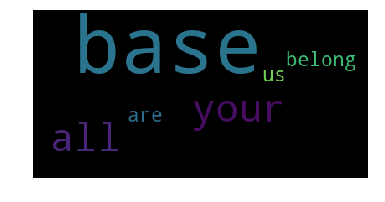

In [42]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS

text = 'all your base are belong to us all of your base base base'
wordcloud = WordCloud(
                      relative_scaling = 1.0,
                      stopwords = {'to', 'of'} # set or space-separated string
                      ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
addLabel = pd.merge(varpd, Labels[["id","truthClass"]], on = "id")
clickbait = addLabel.loc[addLabel["truthClass"]==1]
nonclickbait = addLabel.loc[addLabel["truthClass"]==-1]

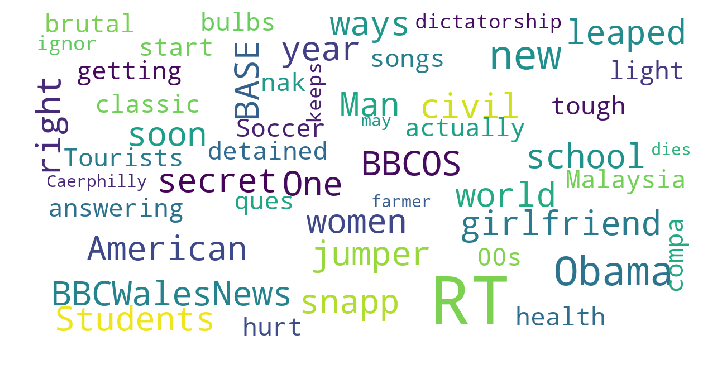

In [93]:
show_wordcloud(clickbait["postText"])

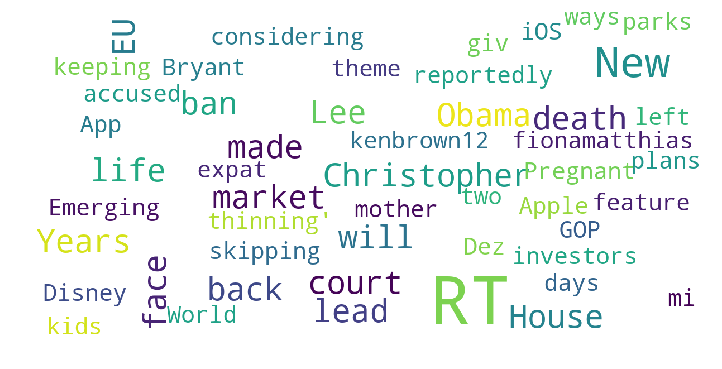

In [94]:
show_wordcloud(nonclickbait["postText"])

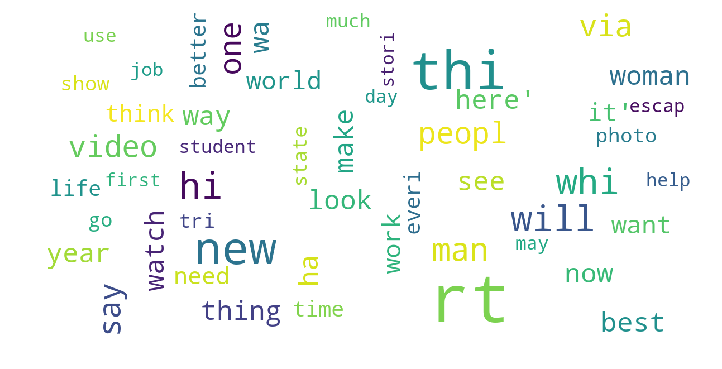

In [46]:
stemmedclickbait=stemmingPostTitles(clickbait["postText"].tolist(),"porter")
show_wordcloud(stemmedclickbait)

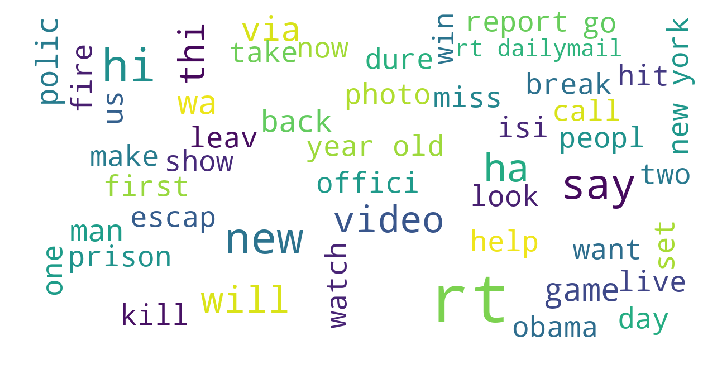

In [47]:
nonstemmedclickbait=stemmingPostTitles(nonclickbait["postText"].tolist(),"porter")
show_wordcloud(nonstemmedclickbait)

# Analysis of Classifier results

In [144]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(finalFeatures.iloc[:,1:len(finalFeatures.columns)-1], finalFeatures.iloc[:,-1], test_size=0.4, random_state=0)

# clf = LogisticRegressionCV()
scores = cross_val_score(clf, featwithLab.iloc[:,1:81], featwithLab.iloc[:,81], cv=10)
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

misclassified = np.where(y_test != clf.predict(X_test))

NameError: name 'featwithLab' is not defined

In [148]:
finalFeatures

,id,postlen,titlelen,desclen,keylen,caplen,paralen,postword,titleword,descword,...,porter_€_˜,porter_€_“,porter_€_”,porter_€_™,porter_€_�,porter_™,porter_™_s,porter_™_t,porter_�,truthClass
0,608310377143799808,75,103,184,78,312,153,15,18,32,...,0,0,0,0,0,0,0,0,0,-1
1,609297109095972864,98,54,166,129,44,34,15,8,28,...,0,0,0,0,0,0,0,0,0,-1
2,609504474621612032,89,66,153,-1,51,140,13,11,28,...,0,0,0,0,0,0,0,0,0,1
3,609748367049105408,62,62,114,132,186,210,11,11,18,...,0,0,0,0,0,0,0,0,0,-1
4,608688782821453824,91,34,125,70,101,66,16,6,23,...,0,0,0,0,0,0,0,0,0,1
5,609551038983475200,66,67,-1,-1,-1,49,12,12,-1,...,0,0,0,1,0,1,0,0,0,1
6,609447408955719680,94,76,154,66,-1,290,18,10,27,...,0,0,0,1,0,1,0,1,0,-1
7,609027430624288768,67,67,171,-1,-1,190,12,12,30,...,0,0,0,0,0,0,0,0,0,-1
8,608229011572068352,84,64,142,161,47,326,15,12,28,...,0,0,0,0,0,0,0,0,0,-1
9,609046214554755072,80,79,157,-1,167,157,14,14,25,...,0,0,0,0,0,0,0,0,0,-1


In [149]:
mis = X_test.iloc[misclassified]
mis

,postlen,titlelen,desclen,keylen,caplen,paralen,postword,titleword,descword,keyword,...,porter_€,porter_€_˜,porter_€_“,porter_€_”,porter_€_™,porter_€_�,porter_™,porter_™_s,porter_™_t,porter_�
2074,113,37,154,33,18,268,23,6,30,5,...,0,0,0,0,0,0,0,0,0,0
2219,46,42,136,-1,250,136,7,7,24,-1,...,0,0,0,0,0,0,0,0,0,0
900,44,45,-1,-1,-1,24,9,9,-1,-1,...,0,0,0,0,0,0,0,0,0,0
563,75,75,80,42,25,80,14,14,12,7,...,0,0,0,0,0,0,0,0,0,0
271,116,76,-1,-1,37,50,17,13,-1,-1,...,0,0,0,0,0,0,0,0,0,0
2266,62,46,140,156,18,213,11,8,20,22,...,0,0,0,0,0,0,0,0,0,0
610,77,22,49,-1,18,13,15,3,11,-1,...,0,0,0,0,0,0,0,0,0,0
1240,46,45,38,95,49,128,9,9,8,11,...,0,0,0,0,0,0,0,0,0,0
1714,92,64,109,18,-1,105,15,10,20,3,...,0,0,0,0,0,0,0,0,0,0
195,61,62,261,-1,-1,285,12,12,43,-1,...,0,0,0,0,0,0,0,0,0,0


In [150]:
mis1 = mis.join(varpd, how= "inner")
mis1

,postlen,titlelen,desclen,keylen,caplen,paralen,postword,titleword,descword,keyword,...,porter_�,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle
2074,113,37,154,33,18,268,23,6,30,5,...,0,609261398502322176,[],[Yoga was the preserve of India's highest-cast...,Fri Jun 12 07:30:11 +0000 2015,"[The New York Times, Basic, All Access, Home D...",Yoga was long the preserve of India's highest-...,"India,Yoga,Hinduism,Caste Systems",[NEW DELHI â€” India has persuaded the world t...,Making Yoga an Exercise in Democracy
2219,46,42,136,-1,250,136,7,7,24,-1,...,0,608386956314202112,[media/608386956314202113.jpg],[Chinese actress sued for staring too intensely],Tue Jun 09 21:35:28 +0000 2015,"[In this photo taken Thursday, Aug. 28, 2014, ...","Zhao Wei, one of the most famous stars in Chin...",,"[Zhao Wei, one of the most famous stars in Chi...",Chinese Actress Sued for Her Intense Stare
900,44,45,-1,-1,-1,24,9,9,-1,-1,...,0,610165837824004096,[],[How well do you actually know the US states?],Sun Jun 14 19:24:06 +0000 2015,[],,,"[Where is Wyoming anyway?, Â© 2017 BuzzFeed, Inc]",How Well Do You Actually Know The USÂ States?
563,75,75,80,42,25,80,14,14,12,7,...,0,609859442318946304,[],[Audience with a monster: the pain of staging ...,Sat Jun 13 23:06:36 +0000 2015,[jimmy savile play mcgowan],"Even before it opened, a play about the notori...","Theatre,Jimmy Savile,UK news,Stage,Culture","[Even before it opened, a play about the notor...",Audience with a monster: the pain of staging t...
271,116,76,-1,-1,37,50,17,13,-1,-1,...,0,608506976335585280,[media/608506976335585282.jpg],[RT @BuzzFeedOz: Non-Australians Reacted To Ph...,Wed Jun 10 05:32:23 +0000 2015,"[Sydney Harbour during a thunderstorm., A snak...",,,[â€œHow do you people live in these conditions...,This Is What Happened When We Showed Non-Austr...
2266,62,46,140,156,18,213,11,8,20,22,...,0,608954501089927168,[],[Op-Ed Columnist: From Caitlyn Jenner to a Bro...,Thu Jun 11 11:10:41 +0000 2015,"[The New York Times, Basic, All Access, Home D...",Caitlyn Jenner has started an important nation...,"Transgender and Transsexuals,Jenner Caitlyn (...",[People all over the world have been following...,From Caitlyn Jenner to a Brooklyn High School
610,77,22,49,-1,18,13,15,3,11,-1,...,0,608244675691061248,[media/608244675691061249.jpg],[Morning Briefing: Here's what you need to kno...,Tue Jun 09 12:10:05 +0000 2015,"[The New York Times, Basic, All Access, Home D...",Hereâ€™s what you need to know to start your day.,,"[Good morning., Hereâ€™s what you need to know...",Your Tuesday Briefing
1240,46,45,38,95,49,128,9,9,8,11,...,0,609994040717783040,[media/609994040717783040.jpg],[6 low-sweat exercises to beat the summer heat:],Sun Jun 14 08:01:27 +0000 2015,[2016%2f06%2f30%2f06%2f201504085aphoto.63146.4...,Sweat is no longer an excuse to skip.,"health, fitness, exercise, uncategorized, life...",[It's easy to forgo a quick workout during you...,6 low-sweat exercises to beat the summer heat
1714,92,64,109,18,-1,105,15,10,20,3,...,0,609384792644190208,[media/609384792644190212.jpg],[RT @BR_NBA: VIDEO: The angry Cleveland weathe...,Fri Jun 12 15:40:31 +0000 2015,[],"The angry Cleveland weatherman is back, and ...","NBA, Breaking News","[The angry Cleveland weatherman is back, and t...","Angry Cleveland Weatherman Returns, Whips out ..."
195,61,62,261,-1,-1,285,12,12,43,-1,...,0,608851445278982144,[],[Natural gas firm seeks to prove it's not caus...,Thu Jun 11 04:21:11 +0000 2015,[],A natural gas extraction company controlled by...,,"[FORT WORTH, Texas â€“ Â A natural gas extract...",Natural gas firm seeks to prove it's not causi...


In [151]:
pd.merge(mis1, Labels[["id","truthClass"]], on = "id").to_csv("misclassified.csv")

In [119]:
finalFeatures

,id,postlen,titlelen,desclen,keylen,caplen,paralen,postword,titleword,descword,...,porter_€_˜,porter_€_“,porter_€_”,porter_€_™,porter_€_�,porter_™,porter_™_s,porter_™_t,porter_�,truthClass
0,608310377143799808,75,103,184,78,312,153,15,18,32,...,0,0,0,0,0,0,0,0,0,-1
1,609297109095972864,98,54,166,129,44,34,15,8,28,...,0,0,0,0,0,0,0,0,0,-1
2,609504474621612032,89,66,153,-1,51,140,13,11,28,...,0,0,0,0,0,0,0,0,0,1
3,609748367049105408,62,62,114,132,186,210,11,11,18,...,0,0,0,0,0,0,0,0,0,-1
4,608688782821453824,91,34,125,70,101,66,16,6,23,...,0,0,0,0,0,0,0,0,0,1
5,609551038983475200,66,67,-1,-1,-1,49,12,12,-1,...,0,0,0,1,0,1,0,0,0,1
6,609447408955719680,94,76,154,66,-1,290,18,10,27,...,0,0,0,1,0,1,0,1,0,-1
7,609027430624288768,67,67,171,-1,-1,190,12,12,30,...,0,0,0,0,0,0,0,0,0,-1
8,608229011572068352,84,64,142,161,47,326,15,12,28,...,0,0,0,0,0,0,0,0,0,-1
9,609046214554755072,80,79,157,-1,167,157,14,14,25,...,0,0,0,0,0,0,0,0,0,-1
